In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [2]:
X,y=datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1234)

In [3]:
desired_min=-5
desired_max=5

In [4]:
X_min,X_max=X.min(),X.max()
X_scaled=(X-X_min)/(X_max-X_min)  
X_normalized=X_scaled*(desired_max-desired_min)+desired_min

In [5]:
y_min,y_max=y.min(),y.max()
y_scaled=(y-y_min)/(y_max-y_min)
y_normalized=y_scaled*(desired_max-desired_min)+desired_min

In [6]:
X=X_normalized
y=y_normalized

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

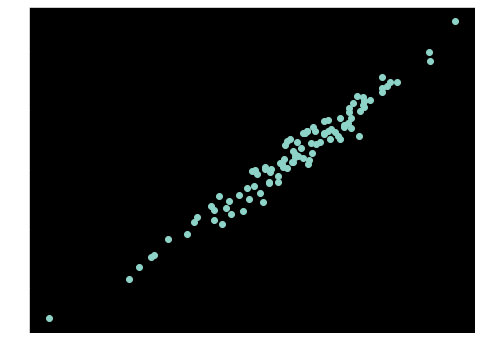

In [8]:
fig=plt.figure(figsize=(8,6))
plt.scatter(X[:,0],y)
plt.show()

In [9]:
import tenseal as ts
poly_mod_degree=8192
coeff_mod_bit_sizes=[60, 40, 40, 60]
context= ts.context(ts.SCHEME_TYPE.CKKS,poly_mod_degree,-1,coeff_mod_bit_sizes)
context.global_scale=2**40
context.generate_galois_keys()

In [10]:
enc_X_train=[]
for i in X_train:
    t=ts.ckks_vector(context,i)
    enc_X_train.append(t)

In [11]:
enc_y_train=[]
for i in y_train:
    t=ts.ckks_vector(context,[i])
    enc_y_train.append(t)

In [12]:
n_samples,n_features=X_train.shape
n_samples,n_features

(80, 1)

In [13]:
weights=list(np.zeros(n_features))
weights=ts.ckks_vector(context,weights)

In [14]:
bias=0
bias

0

In [15]:
lr=0.001
n_iters=1000
multiplier=(1/n_samples)*lr

In [16]:
pre_y_pred=[]
for i in enc_X_train:
    p=i.dot(weights)
    pre_y_pred.append(p)

In [17]:
for i in pre_y_pred[:5]:
    print(i.decrypt())

[-2.487480275769296e-09]
[-5.113579671937802e-09]
[-1.907370195445753e-09]
[-1.8711891467363644e-09]
[-2.6460770730755498e-09]


In [18]:
y_pred=[]
for i in pre_y_pred:
    p=i+bias
    y_pred.append(p)

In [19]:
for i in y_pred[:5]:
    print(i.decrypt())

[-2.487480275769296e-09]
[-5.113579671937802e-09]
[-1.907370195445753e-09]
[-1.8711891467363644e-09]
[-2.6460770730755498e-09]


In [20]:
res=[]
for i,j in zip(y_pred,enc_y_train):
    p=i-j
    res.append(p)

In [21]:
for i in enc_y_train[:5]:
    print(i.decrypt())

[0.5336729621738602]
[1.1471565363420728]
[0.6300988358802373]
[0.3552887955969231]
[1.322496652180225]


In [22]:
for i in res[:5]:
    print(i.decrypt())

[-0.5336729646613405]
[-1.1471565414556528]
[-0.6300988377876077]
[-0.3552887974681122]
[-1.3224966548263024]


In [23]:
res_sum=list(np.zeros(n_features))
res_sum=ts.ckks_vector(context,res_sum)

In [24]:
res_sum.decrypt()

[7.11079437753229e-10]

In [25]:
for i in res:
    res_sum=res_sum+i

In [26]:
res_sum.decrypt()

[-39.01742036261992]

In [27]:
db=res_sum*multiplier
db.decrypt()

[-0.0004877179254392263]

In [29]:
bias=bias-db
bias

In [30]:
bias.decrypt()

[0.0004877179254392263]

In [31]:
hek=[]
for i,j in zip(enc_X_train,res):
    p=i*j
    hek.append(p)

In [32]:
hek=[]
for i,j in zip(enc_X_train,res):
    p=i*j
    hek.append(p)

In [34]:
dem=list(np.zeros(n_features))
dem=ts.ckks_vector(context,dem)
dem.decrypt()

[-5.102926065579559e-10]

In [35]:
for i in hek:
    dem=dem+i

In [36]:
dem.decrypt()

[-268.5038266220088]